In [1]:
# yet again checking the fov calcs
# https://github.com/lsst/rubin_sim/blob/16ecc044179ac7952bc6c9c5deeee2c50ec875d3/rubin_sim/maf/utils/generate_fov_map.py#L76

In [6]:
import numpy as np
import matplotlib.pylab as plt
%matplotlib inline

In [3]:
def gnomonic_project_toxy(ra1, dec1, r_acen, deccen):
    """Calculate x/y projection of ra1/dec1 in system with center at r_acen, deccen.
    Input radians. Grabbed from sims_selfcal"""
    # also used in Global Telescope Network website
    cosc = np.sin(deccen) * np.sin(dec1) + np.cos(deccen) * np.cos(dec1) * np.cos(ra1 - r_acen)
    x = np.cos(dec1) * np.sin(ra1 - r_acen) / cosc
    y = (np.cos(deccen) * np.sin(dec1) - np.sin(deccen) * np.cos(dec1) * np.cos(ra1 - r_acen)) / cosc
    return x, y


def gnomonic_project_tosky(x, y, r_acen, deccen):
    """Calculate RA/dec on sky of object with x/y and RA/Cen of field of view.
    Returns Ra/dec in radians."""
    denom = np.cos(deccen) - y * np.sin(deccen)
    RA = r_acen + np.arctan2(x, denom)
    dec = np.arctan2(np.sin(deccen) + y * np.cos(deccen), np.sqrt(x * x + denom * denom))
    return RA, dec


In [14]:
ra = 0.0
dec = 0.0
rot_sky_pos = 0.0
mjd = 5300.0

nside = int(50)
# 60k pixels, from 0 to 3.5 degrees
x_one = np.linspace(-1.75, 1.75, int(nside))

# make 2-d x,y arrays
x_two = np.broadcast_to(x_one, (nside, nside))
y_two = np.broadcast_to(x_one, (nside, nside)).T


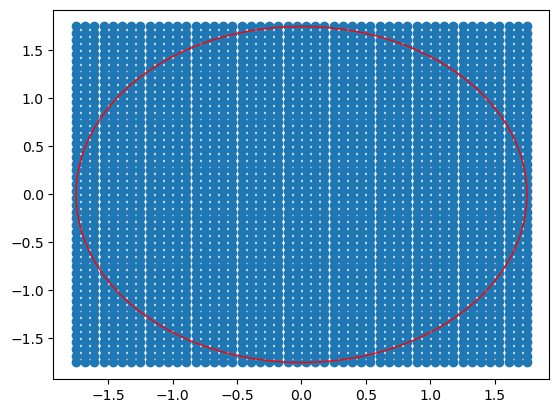

In [30]:

fig, ax = plt.subplots()
ax.scatter(x_two, y_two)
circ = plt.Circle((0,0),1.75, color='red', fill=False)
ax.add_patch(circ)

In [16]:
ra_two, dec_two = gnomonic_project_tosky(np.radians(x_two), np.radians(y_two), ra, dec)

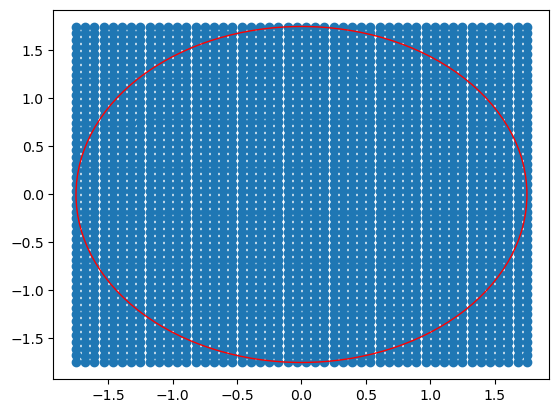

In [29]:
fig, ax = plt.subplots()
ax.scatter(np.degrees(ra_two), np.degrees(dec_two))
circ = plt.Circle((0,0),1.75, color='red', fill=False)
ax.add_patch(circ)